# 3.1 Разбиение выборки. Построение базовой модели

Импорт необходимых библиотек

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn import metrics
import pickle

Загзука базовых данных после предобработки

In [5]:
df = pd.read_csv('Report_C1.csv')
df

,Unnamed: 0,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,maximum temperature C,minimum temperature C,average temperature C
0,0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0
2,2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0
3,3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0
4,4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0
82097,82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0
82098,82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0
82099,82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,31,38.5,0.00,0.0,0,8.0,-1.0,4.0


In [6]:
df.replace('T', 0, inplace = True)
df['snow depth'].value_counts()
df.reset_index()
df.drop(['pickup_datetime','dropoff_datetime'], axis =1, inplace = True )

Разбиение выборки на тренировочную, тестовую и валидационную. Обучение можели на бозовом наборе данных.

In [7]:
y = df['trip_duration']
X = df.drop(['trip_duration', 'Unnamed: 0'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=True)
rmse


118309.10402538895

Модель на базовых данных показывает не очень хороший результат.

Загрузка датасета дополненного признаками с прошлой сессии.

In [8]:
df_2 = pd.read_csv('df2')
df_2.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

df_2['trip_duration_log'] = df_2['trip_duration'].apply(lambda x: np.log(x))

df_2.replace('T', 0, inplace = True)

df_2.pickup_period.fillna('Night')
df_2.dropoff_period.fillna('Night')
df_2

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,...,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean,KMean2,trip_duration_log
0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,40,...,11.0,4.0,8.0,0.931401,104.0,evening,evening,5,3,6.120297
1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,40,...,11.0,4.0,8.0,1.225818,84.0,day,day,1,3,7.204893
2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,40,...,11.0,4.0,8.0,1.564463,90.0,day,day,8,6,6.543912
3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,40,...,11.0,4.0,8.0,1.805540,26.0,morning,morning,7,7,6.626718
4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,40,...,11.0,4.0,8.0,1.384027,90.0,day,day,3,1,6.956545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,46,...,14.0,8.0,11.0,6.786669,116.0,evening,evening,0,4,7.195937
82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,46,...,14.0,8.0,11.0,6.047558,126.0,evening,evening,8,0,6.762730
82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,46,...,14.0,8.0,11.0,2.488969,118.0,evening,evening,8,5,6.621406
82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,31,...,8.0,-1.0,4.0,3.373916,142.0,NaN,NaN,8,2,7.032624


Кодировка строковых столбцов с помощью LabelEncoder. Удаление столбцов с датой.

In [9]:
le = preprocessing.LabelEncoder()
le.fit(df_2['pickup_period'])
df_2['pickup_period'] = le.transform(df_2['pickup_period'])
df_2['dropoff_period'] = le.transform(df_2['dropoff_period'])

df_2.drop(['pickup_datetime','dropoff_datetime'], axis =1, inplace = True )

df_2

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,...,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean,KMean2,trip_duration_log
0,1,-73.982155,40.767937,-73.964630,40.765602,455,51,40,45.5,0.29,...,11.0,4.0,8.0,0.931401,104.0,1,1,5,3,6.120297
1,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,40,45.5,0.29,...,11.0,4.0,8.0,1.225818,84.0,0,0,1,3,7.204893
2,1,-73.994484,40.745087,-73.998993,40.722710,695,51,40,45.5,0.29,...,11.0,4.0,8.0,1.564463,90.0,0,0,8,6,6.543912
3,3,-73.944359,40.714489,-73.910530,40.709492,755,51,40,45.5,0.29,...,11.0,4.0,8.0,1.805540,26.0,2,2,7,7,6.626718
4,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,40,45.5,0.29,...,11.0,4.0,8.0,1.384027,90.0,0,0,3,1,6.956545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,46,51.5,0.00,...,14.0,8.0,11.0,6.786669,116.0,1,1,0,4,7.195937
82097,1,-73.981003,40.747387,-73.871025,40.774174,865,57,46,51.5,0.00,...,14.0,8.0,11.0,6.047558,126.0,1,1,8,0,6.762730
82098,1,-73.997696,40.757000,-73.975121,40.788696,751,57,46,51.5,0.00,...,14.0,8.0,11.0,2.488969,118.0,1,1,8,5,6.621406
82099,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,31,38.5,0.00,...,8.0,-1.0,4.0,3.373916,142.0,3,3,8,2,7.032624


# 3.2 Выбор модели

Разбиение выборки.

In [10]:
y2 = df_2['trip_duration_log']
X2 = df_2.drop(['trip_duration_log','trip_duration', 'maximum temperature', 'minimum temperature', 'precipitation', 'maximum temperature C', 'minimum temperature C', 'average temperature C', 'dropoff_period', 'average temperature', 'snow fall', 'snow depth'], axis = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test, y2_test)

X2

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance_line_km,periods,pickup_period,KMean,KMean2
0,1,-73.982155,40.767937,-73.964630,40.765602,0.931401,104.0,1,5,3
1,1,-73.975090,40.758766,-73.953201,40.765068,1.225818,84.0,0,1,3
2,1,-73.994484,40.745087,-73.998993,40.722710,1.564463,90.0,0,8,6
3,3,-73.944359,40.714489,-73.910530,40.709492,1.805540,26.0,2,7,7
4,1,-73.952881,40.766468,-73.978630,40.761921,1.384027,90.0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
82096,1,-73.863770,40.770161,-73.744225,40.732197,6.786669,116.0,1,0,4
82097,1,-73.981003,40.747387,-73.871025,40.774174,6.047558,126.0,1,8,0
82098,1,-73.997696,40.757000,-73.975121,40.788696,2.488969,118.0,1,8,5
82099,1,-73.994049,40.756538,-74.007645,40.708820,3.373916,142.0,3,8,2


Построение линейной модели и оценки качества.

In [11]:
reg2 = LinearRegression().fit(X2_train, y2_train)

y2_pred = reg2.predict(X2_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_val, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_val, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_val, y2_pred)))

Mean Absolute Error: 0.3113456558335643
Mean Squared Error: 0.14651441161658282
Root Mean Squared Error: 0.38277200997014243


Модель алгоритма "Случайный лес", оценка ее качества.

In [12]:
regressor = RandomForestRegressor(n_estimators = 100,random_state = 42)
regressor.fit(X2_train, y2_train)
y_pred_tree = regressor.predict(X2_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_val, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y2_val, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_val, y_pred_tree)))

Mean Absolute Error: 0.2324782407029527
Mean Squared Error: 0.08870426976356126
Root Mean Squared Error: 0.29783262038192065


Модель случайного леса показала лучше качество.

In [13]:
with open("model2.pkl", "wb") as f:
    pickle.dump(regressor, f)

# 3.3 Оптимизация модели

In [14]:
parameters = {'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140]}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X2_train, y2_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Ana

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Ana

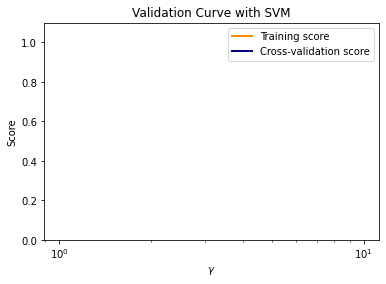

In [16]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X2, y2, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [17]:
with open("model.pkl", "wb") as f:
    pickle.dump(regressor, f)

In [18]:
df_2

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,...,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean,KMean2,trip_duration_log
0,1,-73.982155,40.767937,-73.964630,40.765602,455,51,40,45.5,0.29,...,11.0,4.0,8.0,0.931401,104.0,1,1,5,3,6.120297
1,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,40,45.5,0.29,...,11.0,4.0,8.0,1.225818,84.0,0,0,1,3,7.204893
2,1,-73.994484,40.745087,-73.998993,40.722710,695,51,40,45.5,0.29,...,11.0,4.0,8.0,1.564463,90.0,0,0,8,6,6.543912
3,3,-73.944359,40.714489,-73.910530,40.709492,755,51,40,45.5,0.29,...,11.0,4.0,8.0,1.805540,26.0,2,2,7,7,6.626718
4,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,40,45.5,0.29,...,11.0,4.0,8.0,1.384027,90.0,0,0,3,1,6.956545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,46,51.5,0.00,...,14.0,8.0,11.0,6.786669,116.0,1,1,0,4,7.195937
82097,1,-73.981003,40.747387,-73.871025,40.774174,865,57,46,51.5,0.00,...,14.0,8.0,11.0,6.047558,126.0,1,1,8,0,6.762730
82098,1,-73.997696,40.757000,-73.975121,40.788696,751,57,46,51.5,0.00,...,14.0,8.0,11.0,2.488969,118.0,1,1,8,5,6.621406
82099,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,31,38.5,0.00,...,8.0,-1.0,4.0,3.373916,142.0,3,3,8,2,7.032624
